## Airplane Crash Data Analysis

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Setup complete. Ready for Aviation Crash Data Analysis.")

Setup complete. Ready for Aviation Crash Data Analysis.


In [39]:
crash_data = pd.read_csv("Airplane_Crashes_and_Fatalities_Since_1908_20190820105639.csv")
crash_data.head(5)

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,09/07/1909,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,07/12/1912,06:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...


In [40]:
#### Run diagnostics on the data:

crash_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4967 entries, 0 to 4966
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   4967 non-null   object 
 1   Time                   3457 non-null   object 
 2   Location               4963 non-null   object 
 3   Operator               4957 non-null   object 
 4   Flight #               1315 non-null   object 
 5   Route                  4192 non-null   object 
 6   AC Type                4952 non-null   object 
 7   Registration           4694 non-null   object 
 8   cn/ln                  4299 non-null   object 
 9   Aboard                 4949 non-null   float64
 10  Aboard Passangers      4738 non-null   float64
 11  Aboard Crew            4741 non-null   float64
 12  Fatalities             4959 non-null   float64
 13  Fatalities Passangers  4725 non-null   float64
 14  Fatalities Crew        4726 non-null   float64
 15  Grou

#### 1. Data Type Issues

- `Date` column is of type `object` -- I need to convert this to `datetime` for proper time-series analysis.
- `Time` column is an `object` -- I need to convert this to `datetime` as well.
- Count data (e.g. `Aboard`, `Fatalities`, etc.) should be `int`.

#### 2. Missing Data Issues

- `Flight #` has 73.5% Null values -- I need to address this issue.

#### 3. Clean Dates and Extract Year

- Create a new column for `Year` as an integer.

In [41]:
# 1. Convert 'Date' to datetime objects
crash_data['Date'] = pd.to_datetime(crash_data['Date'])

# 2. Extract the year and store it as a new integer column
crash_data['Year'] = crash_data['Date'].dt.year.astype(int)

# 3. Verify the change by checking the dtypes again
print(crash_data[['Date', 'Year']].head())
print(crash_data.dtypes[['Date', 'Year']])

        Date  Year
0 1908-09-17  1908
1 1909-09-07  1909
2 1912-07-12  1912
3 1913-08-06  1913
4 1913-09-09  1913
Date    datetime64[ns]
Year             int64
dtype: object


#### 4. Standardise Column Names

- A consistent formatting of column names makes writing code easier.

In [42]:
# 1. Get the current list of column names
current_cols = crash_data.columns

# 2. Define the new, standardized column names (snake_case, no symbols)
new_cols = [
    'date', 'time', 'location', 'operator', 'flight_no', 'route', 
    'ac_type', 'registration', 'cn_ln', 'aboard_total', 'passengers_aboard', 
    'crew_aboard', 'fatalities_total', 'passengers_fatalities', 
    'crew_fatalities', 'ground_fatalities', 'summary', 'year'
]

# Note: We are keeping the original names for Operator and Location for now.
#       'Aboard' is renamed to 'aboard_total' and 'Fatalities' to 'fatalities_total' for clarity.
#       'Flight #' becomes 'flight_no'.
#       'AC Type' becomes 'ac_type'.

# 3. Apply the new names to the DataFrame
crash_data.columns = new_cols

# 4. Verify the change
print(crash_data.columns)

Index(['date', 'time', 'location', 'operator', 'flight_no', 'route', 'ac_type',
       'registration', 'cn_ln', 'aboard_total', 'passengers_aboard',
       'crew_aboard', 'fatalities_total', 'passengers_fatalities',
       'crew_fatalities', 'ground_fatalities', 'summary', 'year'],
      dtype='object')


#### 5. Handle missing Fatality/Aboard Counts

- `NaN` values to be replaced with zeroes, and the data type converted from `float64` to `int64`.

In [43]:
# Identify all columns that should represent a count of people
count_cols = [
    'aboard_total', 'passengers_aboard', 'crew_aboard', 
    'fatalities_total', 'passengers_fatalities', 'crew_fatalities', 
    'ground_fatalities'
]

# 1. Impute (fill) all NaN values in these count columns with 0.
#    This assumes missing values in these fields mean zero people were involved/affected.
crash_data[count_cols] = crash_data[count_cols].fillna(0)

# 2. Convert the imputed columns from float64 to int64
#    This makes them the correct type for count data.
for col in count_cols:
    # Use astype(int) to convert the columns
    crash_data[col] = crash_data[col].astype(int)

# 3. Verify the changes
print(crash_data[count_cols].head())
print(crash_data[count_cols].dtypes)

   aboard_total  passengers_aboard  crew_aboard  fatalities_total  \
0             2                  1            1                 1   
1             1                  0            1                 1   
2             5                  0            5                 5   
3             1                  0            1                 1   
4            20                  0            0                14   

   passengers_fatalities  crew_fatalities  ground_fatalities  
0                      1                0                  0  
1                      0                0                  0  
2                      0                5                  0  
3                      0                1                  0  
4                      0                0                  0  
aboard_total             int64
passengers_aboard        int64
crew_aboard              int64
fatalities_total         int64
passengers_fatalities    int64
crew_fatalities          int64
ground_fatalities    

#### Clean `time` and Create `time_of_day`

In [44]:
# 1. Fill missing 'time' values with a placeholder string ('Unknown')
crash_data['time'] = crash_data['time'].fillna('Unknown')

# 2. Extract only the hour part of the time string (e.g., '14:30' -> 14)
# We use a lambda function to handle both 'Unknown' and valid time strings
def extract_hour(time_str):
    if time_str == 'Unknown' or not ':' in time_str:
        return -1 # Use -1 as a flag for Unknown/Invalid time
    try:
        # Split by ':' and try to convert the first part to an integer
        return int(time_str.split(':')[0])
    except ValueError:
        # Catch cases where the hour part might not be a number
        return -1

crash_data['hour'] = crash_data['time'].apply(extract_hour)

# 3. Define time categories based on the hour
def get_time_of_day(hour):
    if hour == -1:
        return 'Unknown'
    elif 5 <= hour < 12:
        return 'Morning (5-11)'
    elif 12 <= hour < 17:
        return 'Afternoon (12-16)'
    elif 17 <= hour < 21:
        return 'Evening (17-20)'
    else: # 21-4 (including 21, 22, 23, 0, 1, 2, 3, 4)
        return 'Night (21-4)'

crash_data['time_of_day'] = crash_data['hour'].apply(get_time_of_day)

# 4. Verify the distribution of the new feature
print("\nDistribution of Time of Day:")
print(crash_data['time_of_day'].value_counts())


Distribution of Time of Day:
time_of_day
Unknown              1510
Morning (5-11)       1100
Afternoon (12-16)     944
Night (21-4)          731
Evening (17-20)       682
Name: count, dtype: int64


The analysis of the distribution of the `time_of_day` shows us the following:

- 30.4% of crashes are `Unknown`, meaning that the largest category of crash times aren't even known. This will impact my analysis.
- Among the known times, `Morning (5-11)` is the highest with 22.1% of the crashes in this category.

When presenting findings related to the time of day, I must stress the uncertainty due to the `Unknown` category affecting my results. That being said, the `time_of_day` is still a useful feature to use when analysing crash severity and operator types.

#### Cleaning Location Data

I want to extract the country from the `location` column. Please note that `USSR` has been changed to `Russia` to simplify the analysis, as both refer to roughly the same area on the map. The same holds for the `Yugoslavia` -> `Serbia` transition.

In [45]:
# 1. Fill missing 'location' values with a placeholder string ('Unknown')
crash_data['location'] = crash_data['location'].fillna('Unknown')

# 2. Extract the country (last word after splitting by comma)
# The .str.split(',')[-1].str.strip() is robust for extracting the last part and cleaning whitespace
# The .apply(lambda x: x if x else 'Unknown') handles edge cases where the split is messy
crash_data['country'] = crash_data['location'].str.split(',').str[-1].str.strip()

# 3. Handle common misspellings or aliases (Data Analyst Standardization)
country_corrections = {
    'USSR': 'Russia',
    'Russia': 'Russia',
    'New Guinea': 'Papua New Guinea',
    'UK': 'United Kingdom',
    'Indian Ocean (Indonesia)': 'Indonesia',
    'Yugoslavia': 'Serbia',
    'Near East (Turkey)': 'Turkey',
    'China Sea': 'Ocean',
    'South Vietnam': 'Vietnam',
    'Taiwan': 'China' # Simplification based on common practice for historical data
}
crash_data['country'] = crash_data['country'].replace(country_corrections)

# 4. Verify the top 10 most frequent countries
print("\nTop 10 Countries by Crash Count:")
print(crash_data['country'].value_counts().head(10))


Top 10 Countries by Crash Count:
country
Russia        322
Brazil        175
Colombia      151
China         128
Canada        125
France        125
California    115
India         103
Alaska        102
England       101
Name: count, dtype: int64


California and Alaska are US states, not countries. I need to correct this.

In [46]:
# List common US states that might appear in the 'country' column
us_states = [
    'California', 'Alaska', 'Texas', 'Florida', 'Nevada', 
    'Arizona', 'Virginia', 'New Jersey', 'New York', 'Pennsylvania', 
    'Ohio', 'Illinois', 'Washington', 'Oregon', 'Utah', 'Georgia', 
    'North Carolina', 'South Carolina', 'Mississippi', 'Oklahoma', 'Hawaii',
    'Iowa', 'Michigan', 'Kansas', 'Nebraska', 'Missouri', 'Massachusetts', 
    'Connecticut', 'Maryland', 'Maine', 'Rhode Island', 'Delaware', 'Alabama', 
    'Colorado', 'Idaho', 'Kentucky', 'Minnesota', 'Montana', 'New Mexico', 
    'North Dakota', 'South Dakota', 'Tennessee', 'Vermont', 'West Virginia', 
    'Wyoming', 'Wisconsin', 'Indiana'
]

# Apply the correction: if the entry is in the US states list, set it to 'United States'
crash_data['country'] = crash_data['country'].apply(
    lambda x: 'United States' if x in us_states else x
)

# Also explicitly include the obvious 'USA' and 'US' entries if they exist (standardization)
crash_data['country'] = crash_data['country'].replace({
    'USA': 'United States',
    'US': 'United States'
})

# 3. Verify the new top 10 most frequent countries
print("\nTop 10 Countries by Crash Count (Post-US Correction):")
print(crash_data['country'].value_counts().head(10))


Top 10 Countries by Crash Count (Post-US Correction):
country
United States    979
Russia           322
Brazil           175
Colombia         151
China            128
France           125
Canada           125
India            103
England          101
Indonesia         97
Name: count, dtype: int64


##### Key Insights:

- The US is *by far* the most frequent location for airplane crashes in this dataset, with 979 crashes.
- Keeping in mind that the USSR and Russia have different borders, Russia is in second place with 322 crashes.

Before continuing on to the case study questions, I will visualise annual crash trends.

#### Visualising Annual Crash Trends

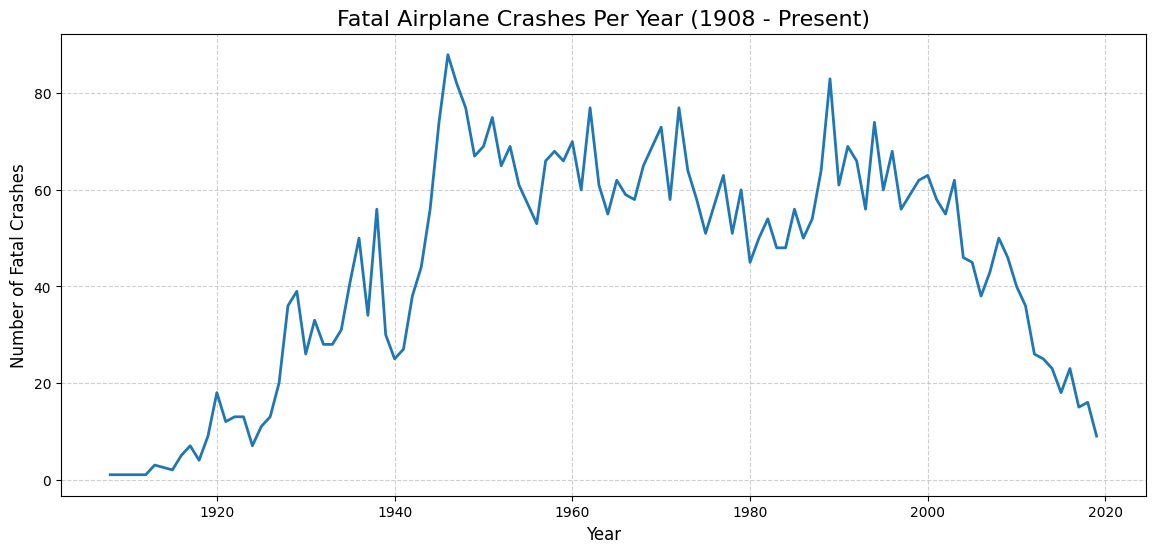

In [47]:
# 1. Group the data by year and count the number of crashes
yearly_crashes = crash_data.groupby('year').size().reset_index(name='crash_count')

# 2. Set up the visualization
plt.figure(figsize=(14, 6))
sns.lineplot(x='year', y='crash_count', data=yearly_crashes, linewidth=2)

# 3. Add titles and labels for professional presentation
plt.title('Fatal Airplane Crashes Per Year (1908 - Present)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Fatal Crashes', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig("fatal_crashes_per_year.jpeg", format = "jpeg", dpi = 300)
plt.show()

#### **________________________________________________________________________________________________________________________________**

#### Ten-Year Period with the Most Airplane Crashes

I perform **binning** on the `year` column:

In [48]:
# 1. Create a 10-year period column (e.g., 1950, 1951, ... -> 1950-1959)
# We subtract the remainder when divided by 10 from the year.
# E.g., 1958 - (1958 % 10) = 1950
crash_data['decade_start'] = crash_data['year'] - (crash_data['year'] % 10)

# 2. Group by the decade start year and count the total number of crashes
decade_crashes = crash_data.groupby('decade_start').size().reset_index(name='crash_count')

# 3. Find the decade with the maximum crash count
max_crashes_decade = decade_crashes.loc[decade_crashes['crash_count'].idxmax()]

# 4. Format the result for clear presentation
start_year = int(max_crashes_decade['decade_start'])
end_year = start_year + 9
crash_count = int(max_crashes_decade['crash_count'])

print(f"1. Most Crashes: {start_year}-{end_year} with {crash_count} incidents.")

1. Most Crashes: 1950-1959 with 649 incidents.


#### Ten-Year Period with the Most Fatalities Onboard

Using the `decade_start` column created in the previous section of code, I sum the `fatalities_total` column:

In [49]:
# 1. Group by the decade start year and sum the total fatalities onboard
decade_fatalities = crash_data.groupby('decade_start')['fatalities_total'].sum().reset_index(name='total_fatalities')

# 2. Find the decade with the maximum total fatalities
max_fatalities_decade = decade_fatalities.loc[decade_fatalities['total_fatalities'].idxmax()]

# 3. Format the result for clear presentation
start_year = int(max_fatalities_decade['decade_start'])
end_year = start_year + 9
fatality_count = int(max_fatalities_decade['total_fatalities'])

print(f"2. Most Fatalities Onboard: {start_year}-{end_year} with {fatality_count:,} total fatalities.")

2. Most Fatalities Onboard: 1970-1979 with 19,751 total fatalities.


#### Ten-Year Period with the Most Crashes Due to Thunder/Lightning

Use a string search method on the `summary` column to find the relevant crashes:

In [50]:
# 1. Filter the DataFrame for records where 'summary' contains "thunder" or "lightning"
# The .str.contains() method is used for flexible text search, ignoring case
lightning_crashes = crash_data[
    crash_data['summary'].str.contains('thunder|lightning', case=False, na=False)
].copy()

# 2. Group the filtered data by the decade and count the incidents
decade_lightning = lightning_crashes.groupby('decade_start').size().reset_index(name='lightning_crash_count')

# 3. Find the decade with the maximum lightning-related crashes
max_lightning_decade = decade_lightning.loc[decade_lightning['lightning_crash_count'].idxmax()]

# 4. Format the result for clear presentation
start_year = int(max_lightning_decade['decade_start'])
end_year = start_year + 9
lightning_count = int(max_lightning_decade['lightning_crash_count'])

print(f"3. Most Thunder/Lightning Crashes: {start_year}-{end_year} with {lightning_count} incidents.")

3. Most Thunder/Lightning Crashes: 1950-1959 with 29 incidents.


The decade with the **most crashes** was the 1950s, during the post-WWII aviation boom. This was a time when aircraft propulsion transitioned from propellers to jets, and commercial flights became more widespread. Due to this combination of new technology and higher volumes, crashes were common, necessitating major safety regulations that we take for granted today. Anyone who has seen *Air Crash Investigation* can attest to this.

The decade with the most fatalities was the 1970s, with 19 751 in total. This decade coincides with the introduction of wide-body aircraft like the famous Boeing 747, with an associated increase in passenger capacity per flight. While the *number* of crashes in this decade was lower than in the 1950s, the greater capacity of planes meant more people killed per crash. This highlights the utility of using the *fatalities per flight* metric to assess safety standards and risks.

The decade with the most crashes due to thunder and/or lightning was also the 1950s. Compared to the weather forecast and detection technologies we enjoy today, the 1950s was relatively rudimentary. Combined with the new technology (jets vs. propellers) that allowed planes to fly higher, it stands to reason that planes would more commonly crash due to being struck by lightning than in any other decade. Plane construction methods (to allow the electric current to pass harmlessly across the outer surface of the fuselage) has allowed modern planes to fly more safely through thunderstorms than they did back then. Planes can also fly higher than in the 1950s, allowing them to fly *over* thunderstorms instead of *through* them - I have witnessed this firsthand.

* The 1950s were the riskiest period in aviation history, characterized by the highest volume of crashes, including weather-related events.

* The 1970s saw a shift: while the number of incidents declined (suggesting improving safety), the sheer scale of accidents increased due to the introduction of larger planes, resulting in the deadliest decade by total count.

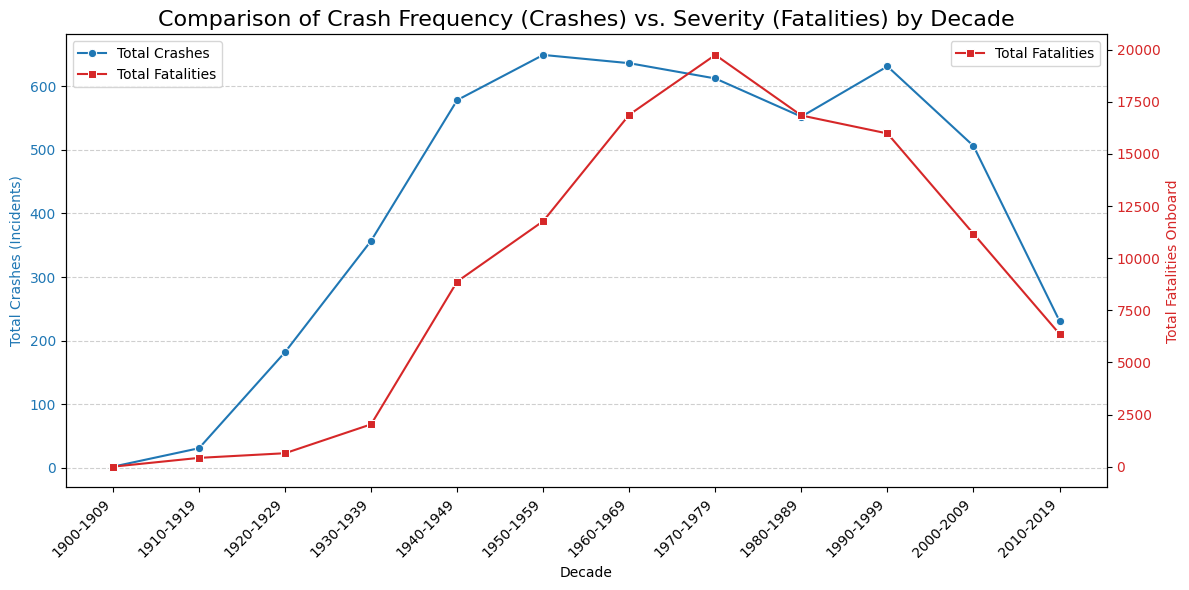

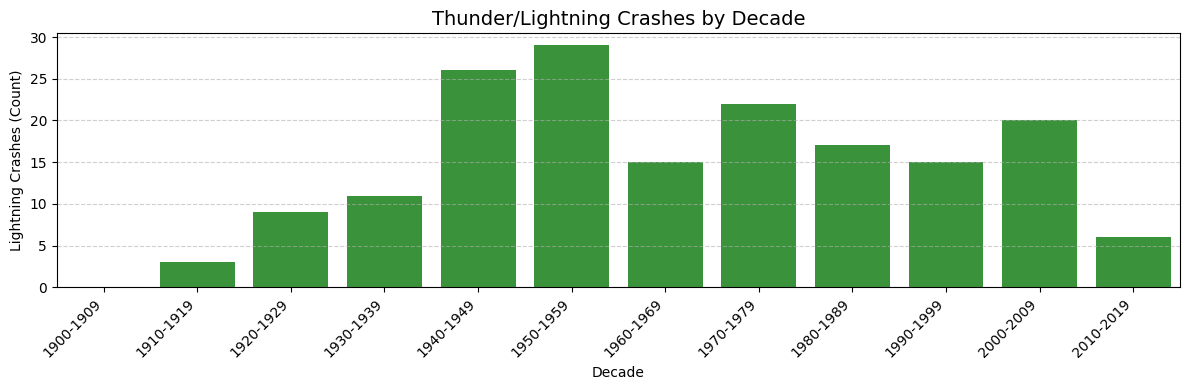

In [51]:
# --- AGGREGATION OF RELEVANT DATA ---
# a. Total Crashes
decade_crashes = crash_data.groupby('decade_start').size().reset_index(name='total_crashes')

# b. Total Fatalities
decade_fatalities = crash_data.groupby('decade_start')['fatalities_total'].sum().reset_index(name='total_fatalities')

# c. Thunder/Lightning Crashes (Filter and Group)
lightning_crashes = crash_data[
    crash_data['summary'].str.contains('thunder|lightning', case=False, na=False)
].copy()
decade_lightning = lightning_crashes.groupby('decade_start').size().reset_index(name='lightning_crashes')

# Merge the datasets into a single DataFrame
merged_decades = decade_crashes.merge(decade_fatalities, on='decade_start', how='outer')
merged_decades = merged_decades.merge(decade_lightning, on='decade_start', how='left').fillna(0)
merged_decades['lightning_crashes'] = merged_decades['lightning_crashes'].astype(int)

# --- PLOT 1: Dual-Axis for Frequency vs. Severity (Crashes and Fatalities) ---
plt.figure(figsize=(12, 6))

# Primary Axis (ax1) for Total Crashes
ax1 = sns.lineplot(x='decade_start', y='total_crashes', data=merged_decades, marker='o', color='tab:blue', label='Total Crashes')
ax1.set_ylabel('Total Crashes (Incidents)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_xlabel('Decade')
ax1.grid(True, linestyle='--', alpha=0.6, axis='y')

# Secondary Axis (ax2) for Total Fatalities
ax2 = ax1.twinx() 
sns.lineplot(x='decade_start', y='total_fatalities', data=merged_decades, marker='s', color='tab:red', ax=ax2, label='Total Fatalities')
ax2.set_ylabel('Total Fatalities Onboard', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Formatting X-axis labels to show the decade range
decade_labels = [f'{int(y)}-{int(y)+9}' for y in merged_decades['decade_start']]
ax1.set_xticks(merged_decades['decade_start'])
ax1.set_xticklabels(decade_labels, rotation=45, ha='right')

# Add a combined legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

plt.title('Comparison of Crash Frequency (Crashes) vs. Severity (Fatalities) by Decade', fontsize=16)
plt.tight_layout()
plt.savefig("crash-freq-fatalities.jpeg", format = "jpeg", dpi = 300)
plt.show() # Use show() in your notebook

# --- PLOT 2: Bar Plot for Thunder/Lightning Crashes ---
plt.figure(figsize=(12, 4))
sns.barplot(x='decade_start', y='lightning_crashes', data=merged_decades, color='tab:green')

# Formatting X-axis labels
plt.xticks(ticks=range(len(merged_decades['decade_start'])), labels=decade_labels, rotation=45, ha='right')

plt.title('Thunder/Lightning Crashes by Decade', fontsize=14)
plt.xlabel('Decade')
plt.ylabel('Lightning Crashes (Count)')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.savefig("lightning-crashes-decade.jpeg", format = "jpeg", dpi = 300)
plt.show() # Use show() in your notebook

### **__________________________________________________________________________________________________________________**

### Correlation Between Time of Crash and Country

I will perform a Chi-Square Test of Independence, and visualise the relationship with a Contingency Table.

###### To keep the analysis manageable, I will distinguish between the top 10 most frequent crash countries and the others.

In [52]:
# Define the top 10 countries (from previous step's output)
top_10_countries = crash_data['country'].value_counts().head(10).index.tolist()

# 1. Create a new column to categorize countries (Top 10 vs. Others)
crash_data['country_group'] = np.where(
    crash_data['country'].isin(top_10_countries), 
    crash_data['country'], 
    'Other Countries'
)

# 2. Create the Contingency Table (Cross-Tabulation)
# This shows the raw count of crashes for each Country Group and Time of Day.
contingency_table = pd.crosstab(
    crash_data['country_group'], 
    crash_data['time_of_day']
)

# 3. Normalize the table by ROW (index) to get the percentage distribution for each country
# This answers: "For Country X, what percentage of its crashes happen in the Morning, Afternoon, etc.?"
country_time_distribution = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100

print("Percentage Distribution of Time of Crash by Country Group:")
print(country_time_distribution.round(1))

Percentage Distribution of Time of Crash by Country Group:
time_of_day      Afternoon (12-16)  Evening (17-20)  Morning (5-11)  \
country_group                                                         
Brazil                        13.7             14.3            18.3   
Canada                        20.8             16.0            21.6   
China                         13.3             10.9            13.3   
Colombia                      25.2              7.9            25.8   
England                       21.8             11.9            24.8   
France                        20.8             12.8            20.0   
India                         10.7              6.8            22.3   
Indonesia                     25.8              4.1            25.8   
Other Countries               18.3             12.4            22.5   
Russia                        22.0             17.7            22.7   
United States                 20.1             18.8            22.0   

time_of_day      

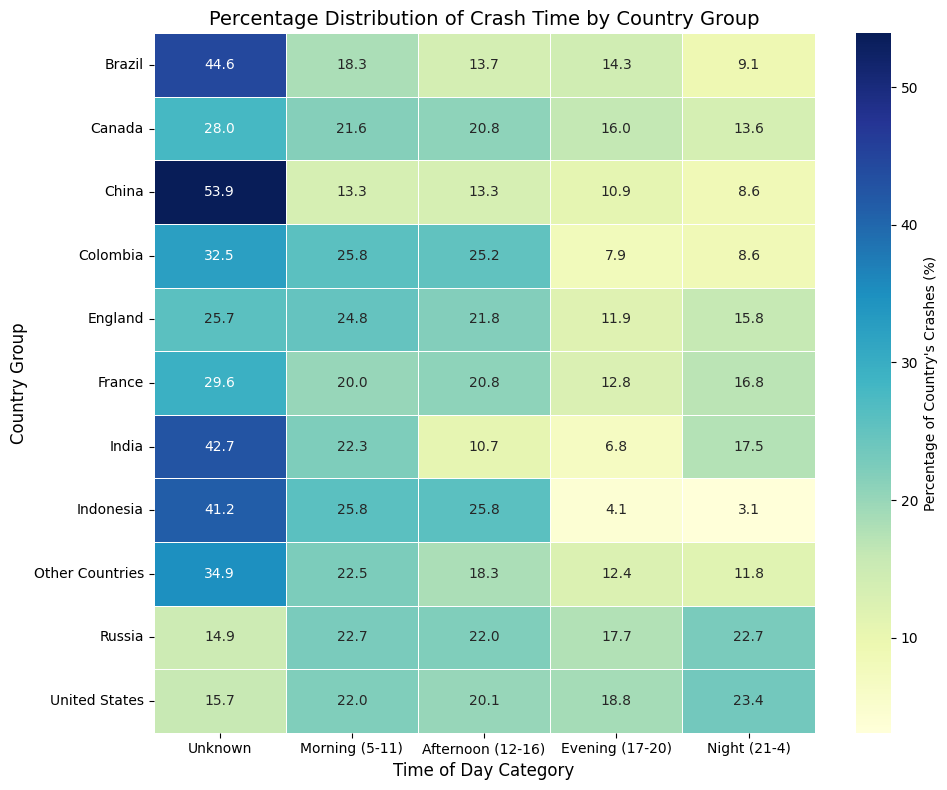

In [53]:
# 1. Reorder columns for optimal visual analysis: Unknown first, then time progression.
cols_ordered = ['Unknown', 'Morning (5-11)', 'Afternoon (12-16)', 'Evening (17-20)', 'Night (21-4)']
country_time_distribution_sorted = country_time_distribution[cols_ordered]

# 2. --- Create the Heatmap ---
plt.figure(figsize=(10, 8))
sns.heatmap(
    country_time_distribution_sorted,
    annot=True,         # Display the percentage values on the heatmap
    fmt=".1f",          # Format annotations to one decimal place
    cmap="YlGnBu",      # Color scheme: Yellow-Green-Blue (good for showing increasing intensity)
    linewidths=.5,
    cbar_kws={'label': 'Percentage of Country\'s Crashes (%)'}
)

plt.title('Percentage Distribution of Crash Time by Country Group', fontsize=14)
plt.ylabel('Country Group', fontsize=12)
plt.xlabel('Time of Day Category', fontsize=12)
plt.yticks(rotation=0)

plt.tight_layout()
plt.savefig("country-time-heatmap.jpeg", format = "jpeg", dpi = 300)
plt.show() # Display the plot in the notebook

What we see here is a weak to moderate relationship, with the primary driver being how well the time of the crash was recorded in each country, as well as variations in night-time crash frequency.

#### Key Findings

1. Significant Discrepancies in the Recording of Data

- Countries like China (53.9%), Brazil (44.6%), India (42.7%) and Indonesia (41.2%) have more crashes with `Unknown` times than the average overall.
- This may indicate that record-keeping in these jurisdictions had issues with accurate recording of at least the time of the crash. This would skew the analysis of the other time categories, but also cast doubt on the fidelity of the other data fields associated with each crash.

- On the other hand, countries like the USA (15.7%) and Russia (14.9%) have low `Unknown` crash times, which suggests a robust infrastructure for record-keeping of flight safety metrics in those jurisdictions.

2. Night-Time Crash Correlations

When looking at the countries with good time data, we see:

- High Night-Time Crash Rate: The US (23.4%) and Russia (22.7%).

- This leads me to the conclusion that countries with a large, 24/7 aviation network has a substantially higher proportion of fatal crashes ocurring at night, compared to countries like Colombia (8.6%) or Indonesia (3.1%). This difference may be due to restricted night-time operations or less complete records.

3. Day-Time Crashes

- Nearly all countries show a trend of having their highest non-unknown crash volumes during the morning and afternoon periods.

- This makes sense, since those times tend to be the highest volume of air traffic for any location worldwide (one only has to look at a time-lapse video of global air traffic to realise this).

In [54]:
country_time_distribution['Unknown'].mean()

np.float64(33.07387095711443)

#### Chi-Squared Test

In [55]:
from scipy.stats import chi2_contingency

# 1. Filter out the "Other Countries" row from the raw table for a cleaner test
#    The large 'Other' category can sometimes inflate the chi-squared statistic.
contingency_table_top10 = contingency_table.loc[contingency_table.index != 'Other Countries']

# 2. Perform the Chi-Squared Test
chi2, p, dof, expected = chi2_contingency(contingency_table_top10)

print(f"Chi-Squared Statistic: {chi2:.2f}")
print(f"P-value: {p:.10f}")
print(f"Degrees of Freedom (DOF): {dof}")

Chi-Squared Statistic: 251.62
P-value: 0.0000000000
Degrees of Freedom (DOF): 36


The p-value indicates that there is a statistically significant relationship between the time of the crash and the country in which the crash occurred.

This correlation is primarily driven by:

1. Reporting Quality: Countries like China and Brazil have a much higher percentage of crashes with Unknown times, while the US and Russia have much lower rates.

2. Night Operations: Countries with large, continuous aviation networks (US, Russia) have a disproportionately higher share of their total crashes occur during the Night (21-4) period.

#### Most Severe Crash 1908-2019

I will use the `fatalities_total` and `ground_fatalities` metrics to assess this question.

In [56]:
# 1. Calculate the 'Total Fatalities' (onboard + ground) for every incident
crash_data['total_fatalities_all'] = crash_data['fatalities_total'] + crash_data['ground_fatalities']

# 2. Find the index of the crash with the maximum value
max_fatality_index = crash_data['total_fatalities_all'].idxmax()

# 3. Extract the relevant details for that single row
most_severe_crash = crash_data.loc[max_fatality_index, [
    'date',
    'location',
    'operator',
    'ac_type',
    'fatalities_total',
    'ground_fatalities',
    'total_fatalities_all',
    'summary'
]]

# 4. Print the result in a readable format
print("\n--- Details of the Most Severe Crash (1908-2019) ---")
print(f"Date: {most_severe_crash['date'].strftime('%Y-%m-%d')}")
print(f"Location: {most_severe_crash['location']}")
print(f"Operator: {most_severe_crash['operator']}")
print(f"Aircraft Type: {most_severe_crash['ac_type']}")
print(f"Fatalities Onboard: {most_severe_crash['fatalities_total']:,}")
print(f"Fatalities on Ground: {most_severe_crash['ground_fatalities']:,}")
print(f"TOTAL FATALITIES: {most_severe_crash['total_fatalities_all']:,}")
print(f"Summary: {most_severe_crash['summary']}")


--- Details of the Most Severe Crash (1908-2019) ---
Date: 2001-09-11
Location: New York City, New York
Operator: American Airlines
Aircraft Type: Boeing 767-223ER
Fatalities Onboard: 92
Fatalities on Ground: 2,750
TOTAL FATALITIES: 2,842
Summary: The aircraft was hijacked shortly after it left Logan International Airport in Boston. The hijackers took control of the aircraft and deliberately crashed it into the north tower of the World Trade Center between the 94th and 99th floors at approximately 450 mph.  After 102 minutes, the building collapsed. It was one of four planes that were hijacked the same day.


The most severe crash for the 1908-2019 period is, quite unsurprisingly, the terrorist attacks on the World Trade Center in New York City on September 11, 2001, a day I remember vividly. Almost 3000 people died that day due to the attacks. But since this is a highly unusual event, and not a typical plane crash, I will look at the dataset without this event to see what the most severe "true" plane crash was.

In [57]:
# 1. Create a filtered DataFrame excluding all incidents on 9/11/2001
non_911_crashes = crash_data[crash_data['date'].dt.date != pd.to_datetime('2001-09-11').date()].copy()

# 2. Recalculate 'total_fatalities_all' (ensuring the column exists in the filtered data)
non_911_crashes['total_fatalities_all'] = non_911_crashes['fatalities_total'] + non_911_crashes['ground_fatalities']

# 3. Find the index of the crash with the new maximum total fatalities
max_fatality_index_non_911 = non_911_crashes['total_fatalities_all'].idxmax()

# 4. Extract the relevant details for that single row
most_severe_crash_non_911 = non_911_crashes.loc[max_fatality_index_non_911, [
    'date',
    'location',
    'operator',
    'ac_type',
    'fatalities_total',
    'ground_fatalities',
    'total_fatalities_all',
    'summary'
]]

# 5. Print the result in a readable format
print("\n--- Details of the Most Severe Crash (Excluding 9/11 Attacks) ---")
print(f"Date: {most_severe_crash_non_911['date'].strftime('%Y-%m-%d')}")
print(f"Location: {most_severe_crash_non_911['location']}")
print(f"Operator: {most_severe_crash_non_911['operator']}")
print(f"Aircraft Type: {most_severe_crash_non_911['ac_type']}")
print(f"Fatalities Onboard: {most_severe_crash_non_911['fatalities_total']:,}")
print(f"Fatalities on Ground: {most_severe_crash_non_911['ground_fatalities']:,}")
print(f"TOTAL FATALITIES: {most_severe_crash_non_911['total_fatalities_all']:,}")
print(f"Summary: {most_severe_crash_non_911['summary']}")


--- Details of the Most Severe Crash (Excluding 9/11 Attacks) ---
Date: 1977-03-27
Location: Tenerife, Canary Islands
Operator: Pan American World Airways / KLM
Aircraft Type: Boeing B-747-121 / Boeing B-747-206B
Fatalities Onboard: 583
Fatalities on Ground: 0
TOTAL FATALITIES: 583
Summary: Both aircraft were diverted to Tenerife because of a bombing at Las Palmas Airport. After an extended delay,  both planes were instructed to back track up the runway. The KLM plane reached its takeoff point while the Pan Am plane was still on the runway. The Pan Am plane continued up the runway missing the taxiway turnout. There was heavy fog on the runway. The KLM plane began its takeoff roll without permission with the Pan Am plane still on the runway. The controller and Pan Am pilot each radioed a warning to the KLM plane, but were not heard because the simultaneous transmissions interfered with each other.The KLM plane hit the Pan Am plane just as it was taking off. Both planes burst into flame

This is the Tenerife Airport Disaster of March 27, 1977, with 583 total fatalities

Summary: Both aircraft were diverted to Tenerife because of a bombing at Las Palmas Airport. After an extended delay,  both planes were instructed to back track up the runway. The KLM plane reached its takeoff point while the Pan Am plane was still on the runway. The Pan Am plane continued up the runway missing the taxiway turnout. There was heavy fog on the runway. The KLM plane began its takeoff roll without permission with the Pan Am plane still on the runway. The controller and Pan Am pilot each radioed a warning to the KLM plane, but were not heard because the simultaneous transmissions interfered with each other.The KLM plane hit the Pan Am plane just as it was taking off. Both planes burst into flames.  KLM 234 + 14 crew,  Pan Am 326 + 9 crew killed. All aboard the KLM plane were killed. The KLM captain was their safety officer and for some months had  been training other pilots using a simulator, where getting takeoff permission was not simulated. The Pan Am aircraft was named Clipper Victor. The KLM aircraft was named Rhine River. Despite all the circumstances the KLM plane was blamed for taking off without permission by the NTSB.

##### Additional Information

This tragic accident, caused by human error, resulted in several new safety regulations that were implemented worldwide:

1. Mandatory Crew Resource Management (CRM)

The disaster showed that a highly experienced pilot (the KLM captain) could still make a fatal error due to **poor communication, stress, and rigid hierarchy** in the cockpit.

- **Change:** Aviation authorities worldwide (led by the FAA and ICAO) mandated Crew Resource Management (CRM) training.

- **Significance:** CRM focuses on non-technical skills, emphasising communication, teamwork, situational awareness, 
decision-making, and challenging authority (known as "assertiveness training"). It essentially flattened the cockpit hierarchy, empowering the First Officer and Flight Engineer to challenge the Captain's decisions if safety was compromised.

2. Standardised Aviation Terminology

The investigation found that the KLM pilot's ambiguous statement, "We are at takeoff," was misinterpreted by the tower as a positional report, not a request for clearance. Similarly, the Pan Am pilot's comment about still being on the runway was blocked by simultaneous transmissions.

- **Change:** Strict adherence to standardised phrases was enforced globally, making it mandatory to use unambiguous language for all critical phases of flight. For instance:

    - Pilots must say "TAKING OFF" only when they are actually cleared and beginning the roll.

    - Pilots must explicitly say "CLEARED FOR TAKEOFF" when repeating clearance.

    - "Positional" phrases like "We are at takeoff" are banned for clearance confirmation.

3. "Read-Back" Requirements

The confusion regarding the status of the runway and the KLM's takeoff clearance led to enhanced rules requiring explicit confirmation.

- **Change:** Pilots were required to perform a full read-back of crucial instructions (like runway clearance and hold short instructions) to ensure the air traffic controller could verify correct comprehension.

4. Enhanced Ground Visibility and Lighting Protocols

The heavy fog was a key environmental factor.

- **Change:** Airports and air traffic control were required to establish stricter minimum visibility requirements for operations, leading to improved airport lighting systems, runway markings, and ground radar systems to help air traffic controllers monitor runway movements in low visibility.

#### The Second World War: A Different Time

I will filter the data between the years 1939 and 1945, as well as analysing the aircraft type (`ac_type`) and `summary` columns for patterns.

In [58]:
# Define the WW2 period
WW2_start = 1939
WW2_end = 1945

# 1. Filter the data to the WW2 years (1939-1945 inclusive)
ww2_crashes = crash_data[(crash_data['year'] >= WW2_start) & (crash_data['year'] <= WW2_end)].copy()

# 2. Analyze the most frequent aircraft types
top_ac_types = ww2_crashes['ac_type'].value_counts().head(5)

# 3. Analyze the crash types by searching the 'summary' column for keywords
# We look for terms related to military operations/training
military_keywords = [
    'training', 'military', 'test flight', 'combat', 'war', 'gunnery', 'patrol'
]
summary_analysis = ww2_crashes['summary'].str.lower().str.cat(sep=' ')

# Count occurrences of key military/training related terms
summary_counts = {
    keyword: summary_analysis.count(keyword)
    for keyword in military_keywords
}

# 4. Total count of crashes during this period
total_ww2_crashes = len(ww2_crashes)
print(f"Total crashes recorded during 1939-1945: {total_ww2_crashes}")
print("\nTop 5 Aircraft Types Involved in Fatal Crashes (WW2):")
print(top_ac_types)
print("\nKeyword Analysis of Crash Summaries:")
print(summary_counts)

Total crashes recorded during 1939-1945: 294

Top 5 Aircraft Types Involved in Fatal Crashes (WW2):
ac_type
Douglas DC-3                     27
Douglas C-47                     17
Junkers JU-52/3m                 15
Consolidated LB-30A Liberator     6
Lockheed 18 Lodestar              6
Name: count, dtype: int64

Keyword Analysis of Crash Summaries:
{'training': 3, 'military': 13, 'test flight': 2, 'combat': 2, 'war': 16, 'gunnery': 0, 'patrol': 1}


1. **Non-Combat Operational Failure:** The majority of crashes likely resulted from the strain of nonstop wartime operations. Aircraft suffered from poor maintenance due to parts shortages and constant use.

2. **High-Risk Logistics:** Crashes occurred during troop movements, supply runs, and ferrying of newly built planes under stressful conditions, compounded by high traffic volume at military airfields.

3. **Training Accidents:** The explicit mention of 'training' highlights the elevated danger associated with hastily preparing thousands of new pilots for combat, often in complex or unfamiliar aircraft.

### **______________________________________________________________________________________________________________**

#### Comparing Crash Frequency Across Decades

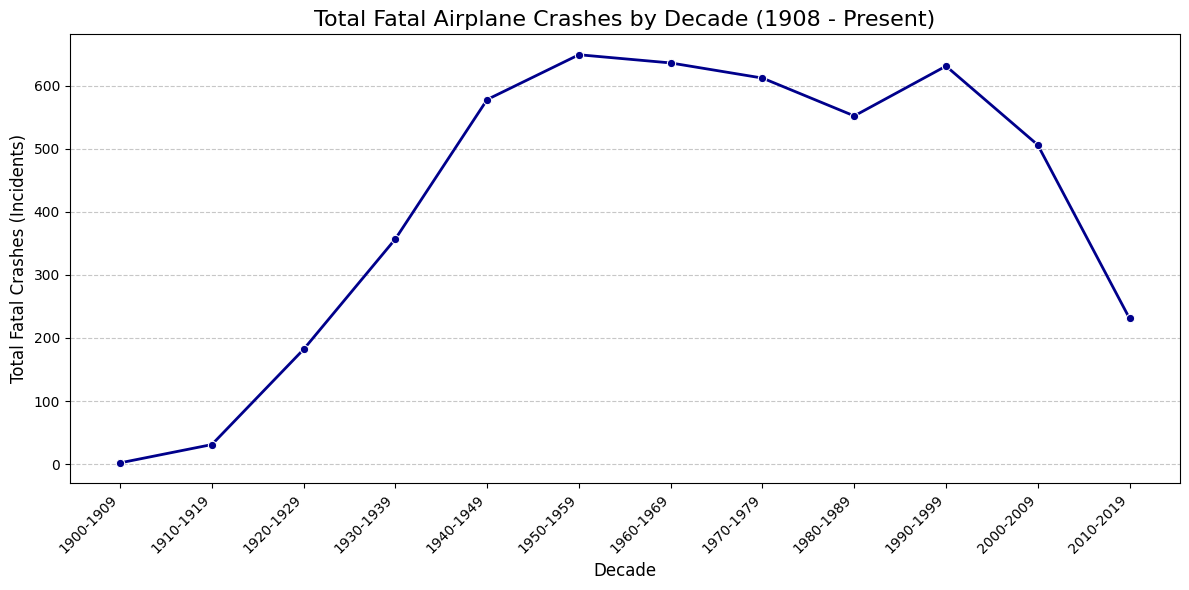

In [61]:
# 1. Ensure 'decade_start' exists (re-run for robustness)
crash_data['decade_start'] = crash_data['year'] - (crash_data['year'] % 10)

# 2. Group the data by decade and count the total number of crashes
decade_crashes = crash_data.groupby('decade_start').size().reset_index(name='crash_count')

# 3. --- Create the Line Plot ---
plt.figure(figsize=(12, 6))

sns.lineplot(
    x='decade_start',
    y='crash_count',
    data=decade_crashes,
    marker='o', # Add markers to clearly show data points
    linewidth=2,
    color='darkblue'
)

# Format X-axis labels to show the decade range
decade_labels = [f'{int(y)}-{int(y)+9}' for y in decade_crashes['decade_start']]
plt.xticks(ticks=decade_crashes['decade_start'], labels=decade_labels, rotation=45, ha='right')

# Add titles and labels
plt.title('Total Fatal Airplane Crashes by Decade (1908 - Present)', fontsize=16)
plt.xlabel('Decade', fontsize=12)
plt.ylabel('Total Fatal Crashes (Incidents)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7, axis='y') # Only show horizontal grid lines for clarity

plt.tight_layout()
plt.savefig("fatal_crashes_per_decade.jpeg", format = "jpeg", dpi = 300)
plt.show()

### Facet Grid: Comparing Decades

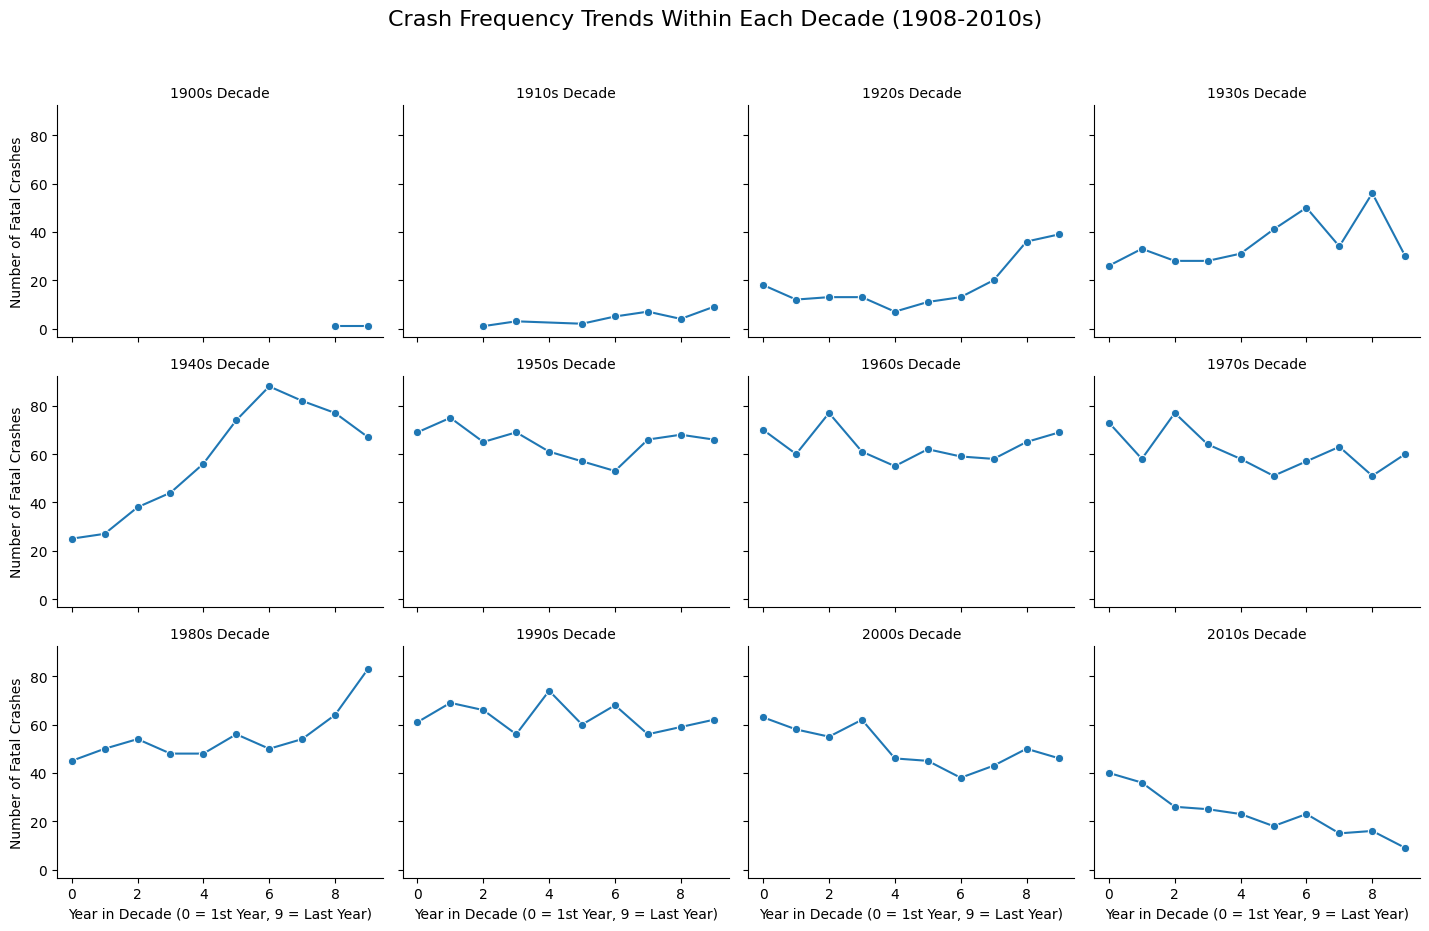

In [ ]:
# 1. Prepare data for plotting by year within the decade
# Calculate 'year_in_decade' (e.g., 1953 -> 3, 2009 -> 9)
crash_data['year_in_decade'] = crash_data['year'] - crash_data['decade_start']

# 2. Group the data by year and decade for the crash count
# This data frame will power the Small Multiples plot
yearly_decade_crashes = crash_data.groupby(['decade_start', 'year_in_decade']).size().reset_index(name='crash_count')

# 3. --- Create the Small Multiples Plot (Facet Grid) ---
# Use seaborn.relplot for simple faceting
g = sns.relplot(
    data=yearly_decade_crashes,
    x="year_in_decade",
    y="crash_count",
    col="decade_start",          # Separate column for each decade
    col_wrap=4,                  # 4 plots per row for a compact display
    kind="line",
    marker="o",
    height=3, aspect=1.2         # Control plot size
)

# Set the title for the entire figure
g.fig.suptitle('Crash Frequency Trends Within Each Decade (1908-2010s)', fontsize=16, y=1.03)

# Label the axes
g.set_axis_labels("Year in Decade (0 = 1st Year, 9 = Last Year)", "Number of Fatal Crashes")

# Customize titles for each subplot (decade)
g.set_titles("{col_name:.0f}s Decade")

plt.tight_layout()
plt.savefig("facet_grid_fatal_crashes_per_decade.jpeg", format = "jpeg", dpi = 300)
plt.show()


#### Visualising Crash Fatalities

In [63]:
# Ensure the decade columns are defined
crash_data['decade_start'] = crash_data['year'] - (crash_data['year'] % 10)
crash_data['year_in_decade'] = crash_data['year'] - crash_data['decade_start']

# Data for Plot 1: Total Fatalities per Decade
decade_fatalities_df = crash_data.groupby('decade_start')['fatalities_total'].sum().reset_index(name='total_fatalities')

# Data for Plot 2: Fatalities per Year within Decade (for Small Multiples)
yearly_decade_fatalities_df = crash_data.groupby(['decade_start', 'year_in_decade'])['fatalities_total'].sum().reset_index(name='fatalities')

# Define decade labels for X-axes
decade_labels = [f'{int(y)}-{int(y)+9}' for y in decade_fatalities_df['decade_start']]

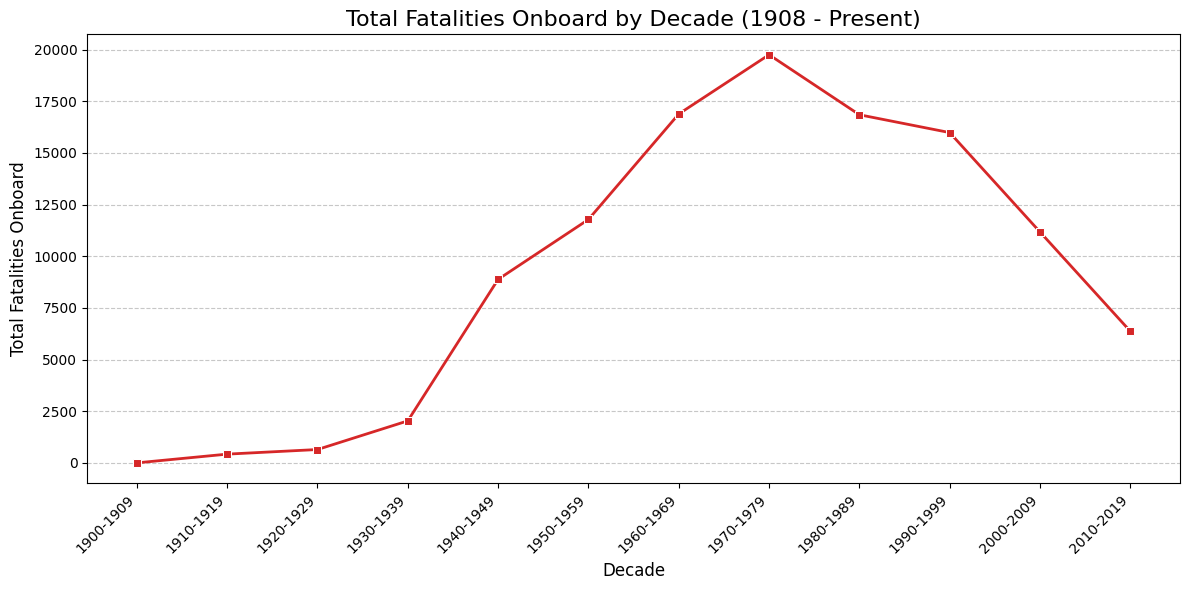

In [64]:
# --- PLOT 1: Single Line Plot (Total Fatalities by Decade) ---
plt.figure(figsize=(12, 6))

sns.lineplot(
    x='decade_start',
    y='total_fatalities',
    data=decade_fatalities_df,
    marker='s',
    linewidth=2,
    color='tab:red'
)

# Format X-axis labels
plt.xticks(ticks=decade_fatalities_df['decade_start'], labels=decade_labels, rotation=45, ha='right')
plt.ticklabel_format(style='plain', axis='y') # Avoid scientific notation

# Add titles and labels
plt.title('Total Fatalities Onboard by Decade (1908 - Present)', fontsize=16)
plt.xlabel('Decade', fontsize=12)
plt.ylabel('Total Fatalities Onboard', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7, axis='y')

plt.tight_layout()
plt.show()

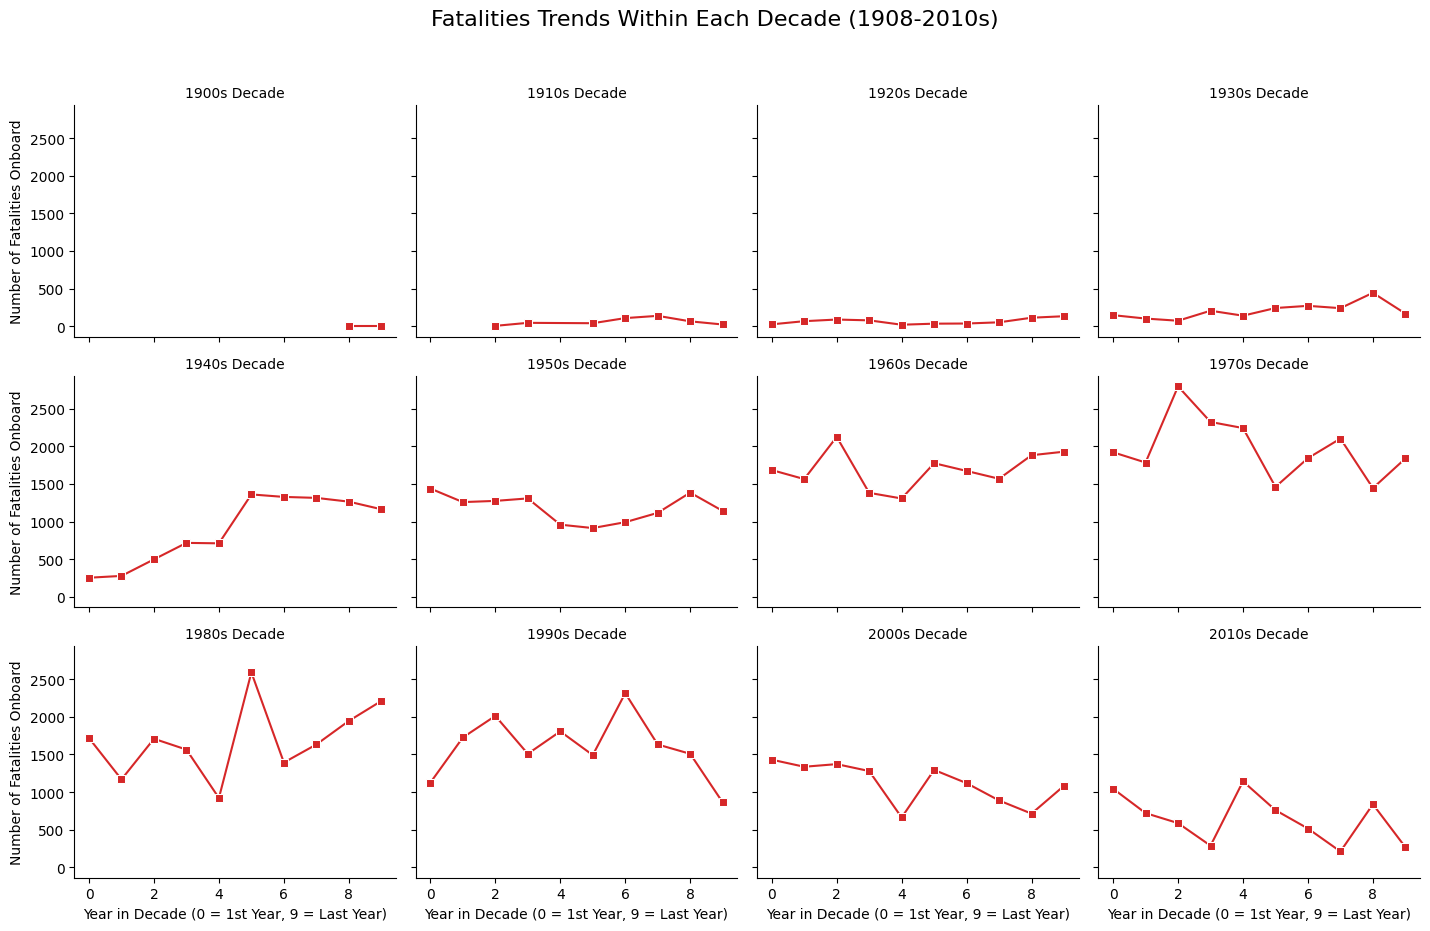

In [72]:
# --- PLOT 2: Small Multiples Plot (Fatalities within Each Decade) ---
g = sns.relplot(
    data=yearly_decade_fatalities_df,
    x="year_in_decade",
    y="fatalities",
    col="decade_start",
    col_wrap=4,
    kind="line",
    marker='s',
    color='tab:red',
    height=3, aspect=1.2 # Control plot size
)

# Set the title for the entire figure
g.fig.suptitle('Fatalities Trends Within Each Decade (1908-2010s)', fontsize=16, y=1.03)

# Label the axes
g.set_axis_labels("Year in Decade (0 = 1st Year, 9 = Last Year)", "Number of Fatalities Onboard")

# Customize titles for each subplot (decade)
g.set_titles("{col_name:.0f}s Decade")

plt.tight_layout()
plt.savefig("facet_grid_fatalities_per_decade.jpeg", format = "jpeg", dpi = 300)
plt.show()

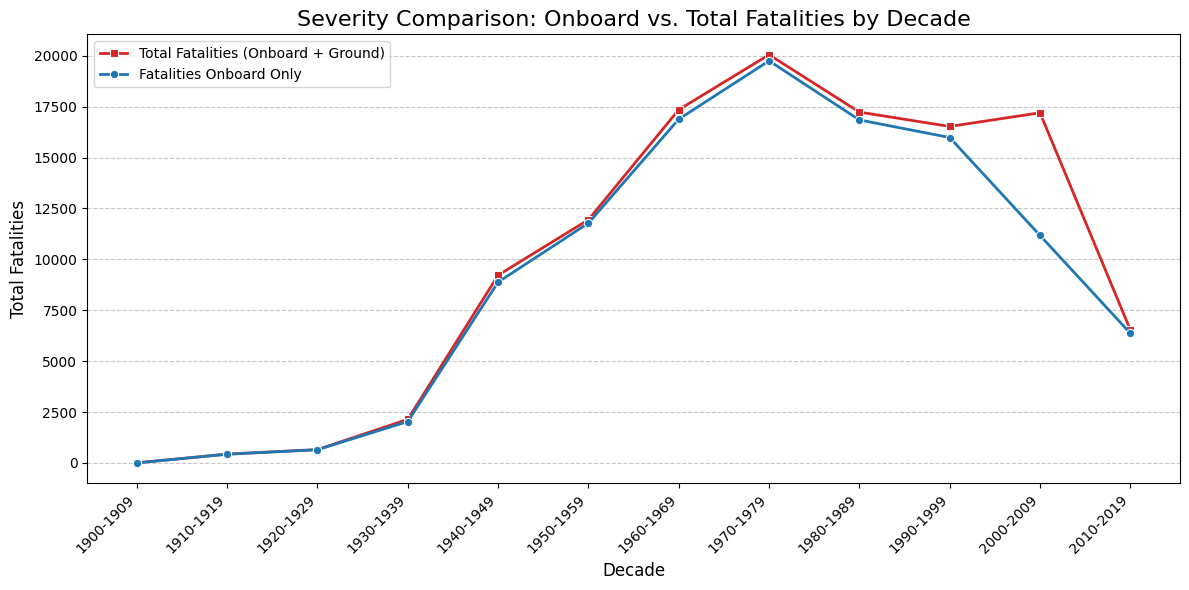

In [71]:
# 1. Aggregate Total Fatalities (Onboard only) and Total Fatalities (All) by decade
decade_fatality_comparison = crash_data.groupby('decade_start').agg(
    onboard_fatalities=('fatalities_total', 'sum'),
    total_fatalities_all=('total_fatalities_all', 'sum') # 'total_fatalities_all' calculated earlier
).reset_index()

# 2. --- Create the Dual Line Plot ---
plt.figure(figsize=(12, 6))

# Line for Total Fatalities (All)
sns.lineplot(
    x='decade_start',
    y='total_fatalities_all',
    data=decade_fatality_comparison,
    marker='s',
    linewidth=2,
    color='tab:red',
    label='Total Fatalities (Onboard + Ground)'
)

# Line for Onboard Fatalities Only
sns.lineplot(
    x='decade_start',
    y='onboard_fatalities',
    data=decade_fatality_comparison,
    marker='o',
    linewidth=2,
    color='tab:blue',
    label='Fatalities Onboard Only'
)

# Format X-axis labels
decade_labels = [f'{int(y)}-{int(y)+9}' for y in decade_fatality_comparison['decade_start']]
plt.xticks(ticks=decade_fatality_comparison['decade_start'], labels=decade_labels, rotation=45, ha='right')

# Add titles and labels
plt.title('Severity Comparison: Onboard vs. Total Fatalities by Decade', fontsize=16)
plt.xlabel('Decade', fontsize=12)
plt.ylabel('Total Fatalities', fontsize=12)
plt.legend(loc='upper left', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7, axis='y')

plt.tight_layout()
plt.savefig("fatalities-onboard-vs-total.jpeg", format = "jpeg", dpi = 300)
plt.show()

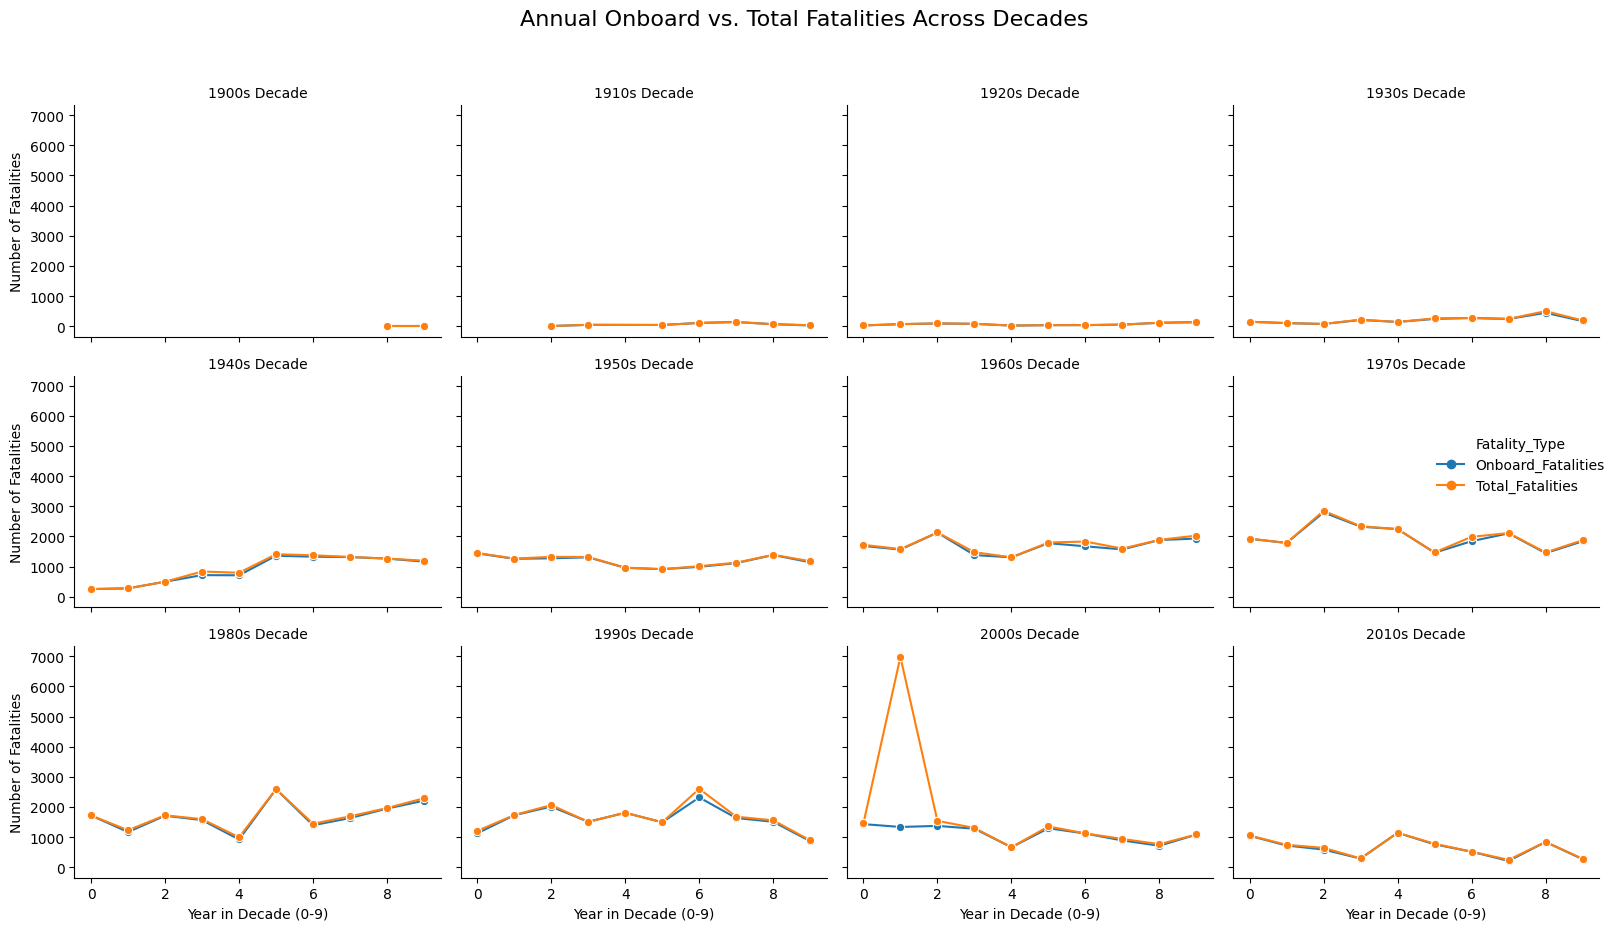

In [70]:
# Ensure the required time columns are calculated
crash_data['decade_start'] = crash_data['year'] - (crash_data['year'] % 10)
crash_data['year_in_decade'] = crash_data['year'] - crash_data['decade_start']

# Ensure the total fatalities column is defined
crash_data['total_fatalities_all'] = crash_data['fatalities_total'] + crash_data['ground_fatalities']

# 1. Aggregate both onboard and total fatalities by year and decade
yearly_decade_fatality_comparison = crash_data.groupby(['decade_start', 'year_in_decade']).agg(
    Onboard_Fatalities=('fatalities_total', 'sum'),
    Total_Fatalities=('total_fatalities_all', 'sum')
).reset_index()

# 2. Reshape the data to LONG FORMAT using melt()
# This creates a 'Fatality_Type' column for the hue and a single 'Fatalities' value column.
long_fatality_data = yearly_decade_fatality_comparison.melt(
    id_vars=['decade_start', 'year_in_decade'],
    value_vars=['Onboard_Fatalities', 'Total_Fatalities'],
    var_name='Fatality_Type',
    value_name='Fatalities'
)

# 3. --- Create the Dual-Line Small Multiples Plot ---
g = sns.relplot(
    data=long_fatality_data,
    x="year_in_decade",
    y="Fatalities",
    col="decade_start",
    col_wrap=4,
    hue="Fatality_Type", # Use the melted column to create two lines per plot
    kind="line",
    marker='o',
    height=3, aspect=1.2
)

# Set the title for the entire figure
g.fig.suptitle('Annual Onboard vs. Total Fatalities Across Decades', fontsize=16, y=1.03)

# Label the axes
g.set_axis_labels("Year in Decade (0-9)", "Number of Fatalities")

# Customize titles for each subplot (decade)
g.set_titles("{col_name:.0f}s Decade")

plt.tight_layout()
plt.show()